# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
!pip install networkx==2.3

In [45]:
!pip install StellarGraph

In [46]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [47]:
data=pd.read_csv('/content/drive/MyDrive/dataset/movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [48]:
data.head()
print(data.values.tolist())

[['m1', 'a1'], ['m2', 'a1'], ['m2', 'a2'], ['m3', 'a1'], ['m3', 'a3'], ['m3', 'a4'], ['m3', 'a5'], ['m3', 'a6'], ['m3', 'a7'], ['m4', 'a1'], ['m4', 'a10'], ['m4', 'a8'], ['m4', 'a9'], ['m5', 'a1'], ['m5', 'a11'], ['m5', 'a12'], ['m5', 'a13'], ['m5', 'a14'], ['m5', 'a15'], ['m5', 'a16'], ['m5', 'a17'], ['m5', 'a18'], ['m5', 'a19'], ['m7', 'a21'], ['m7', 'a22'], ['m8', 'a22'], ['m9', 'a22'], ['m9', 'a23'], ['m10', 'a22'], ['m10', 'a24'], ['m10', 'a25'], ['m11', 'a22'], ['m11', 'a26'], ['m11', 'a27'], ['m11', 'a28'], ['m11', 'a29'], ['m24', 'a47'], ['m25', 'a47'], ['m25', 'a48'], ['m25', 'a49'], ['m25', 'a50'], ['m25', 'a51'], ['m25', 'a52'], ['m25', 'a53'], ['m25', 'a54'], ['m25', 'a55'], ['m25', 'a56'], ['m25', 'a57'], ['m25', 'a58'], ['m25', 'a59'], ['m25', 'a60'], ['m25', 'a61'], ['m25', 'a62'], ['m25', 'a63'], ['m25', 'a64'], ['m25', 'a65'], ['m25', 'a66'], ['m25', 'a67'], ['m25', 'a68'], ['m25', 'a69'], ['m25', 'a70'], ['m26', 'a47'], ['m26', 'a71'], ['m26', 'a72'], ['m26', 'a73'], 

In [49]:
edges = [tuple(x) for x in data.values.tolist()]

In [50]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [51]:
A = list(nx.connected_component_subgraphs(B))[0]

In [52]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


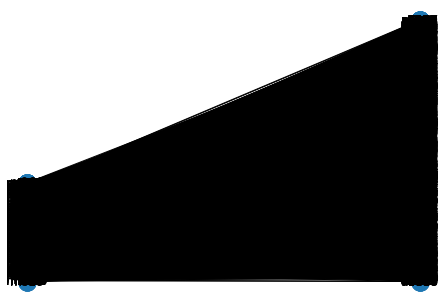

In [53]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [54]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [55]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [56]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [57]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [58]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

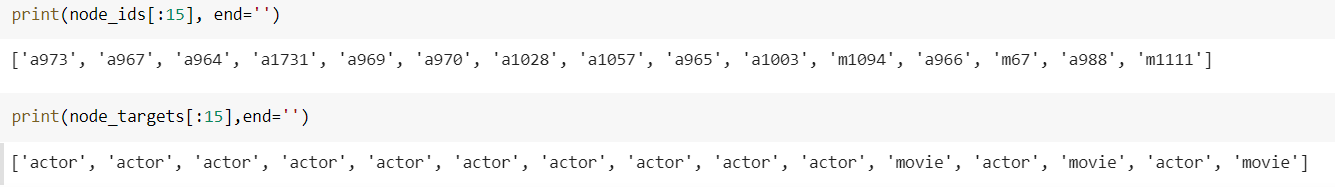

In [59]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes
    actor_nodes = [i for i in node_ids if 'a' in i]
    movie_nodes = [i for i in node_ids if 'm' in i]

    # Create a list to store movie and actor indices
    indice_movie_nodes =[]
    indice_actor_nodes =[]
    for i in range(0, len(node_targets)):
      if node_targets[i]=='actor':
        indice_actor_nodes.append(i)
      else:
        indice_movie_nodes.append(i)
        
    actor_embeddings = node_embeddings[np.asarray(indice_actor_nodes),:]
    movie_embeddings = node_embeddings[np.asarray(indice_movie_nodes),:]

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [60]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings = data_split(node_ids,node_targets,node_embeddings)

<font color='cyan'>Grader function - 1</font>

In [61]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [62]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [68]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    cost1=0
    #for i in number_of_clusters:
    numerator= max(nx.connected_components(graph), key=len)
    denominator = len(graph.nodes)
    cost1+=len(numerator) /denominator
    return cost1/number_of_clusters

# **Task-1**

In [64]:
from sklearn.cluster import KMeans

number_of_clusters = [3, 5, 10, 30, 50, 100, 200, 500]

for cl in number_of_clusters:
  kmeans = KMeans(n_clusters=cl)
  kmeans.fit(actor_embeddings)
  cluster_number_for_data_point = kmeans.labels_
  list_of_all_cluster=[]
  unique = np.unique(cluster_number_for_data_point)
  dict_of_actor_nodes = dict(zip(actor_nodes, cluster_number_for_data_point))
  for number in unique:
    cluster=[]
    for node, cluster_number in dict_of_actor_nodes.items():
      if cluster_number == number:
        cluster.append(node)
    list_of_all_cluster.append(cluster)

  # calculate cost1 and cost2 
  cost1=0
  cost2=0
  for cluster_ in list_of_all_cluster:
    G= nx.Graph()
    for actor_node in cluster_:
      sub_graph = nx.ego_graph(B,actor_node)
      G.add_nodes_from(sub_graph.nodes())
      G.add_edges_from(sub_graph.edges())
    numerator= max(nx.connected_components(G), key=len)
    denominator = len(G.nodes)
    cost1 += len(numerator) /denominator
    numerator_cost2= len(G.edges())
    # Here grap
    # Create empty list
    lst=[]
    # storing movie nodes
    for i in G.nodes():
      if "m" in i:
        lst.append(i)
    denominator_cost2 = len(lst)
    cost2 += numerator_cost2 /denominator_cost2

  print("cluster of cost " ,cl ,(cost1/len(list_of_all_cluster))* (cost2/len(list_of_all_cluster)))


cluster of cost  3 3.7064892697082477
cluster of cost  5 2.8983273236246347
cluster of cost  10 2.224285095576487
cluster of cost  30 1.654588202493629
cluster of cost  50 1.5341741446120767
cluster of cost  100 1.6920561321476626
cluster of cost  200 1.6180860122929732
cluster of cost  500 1.883460807803541


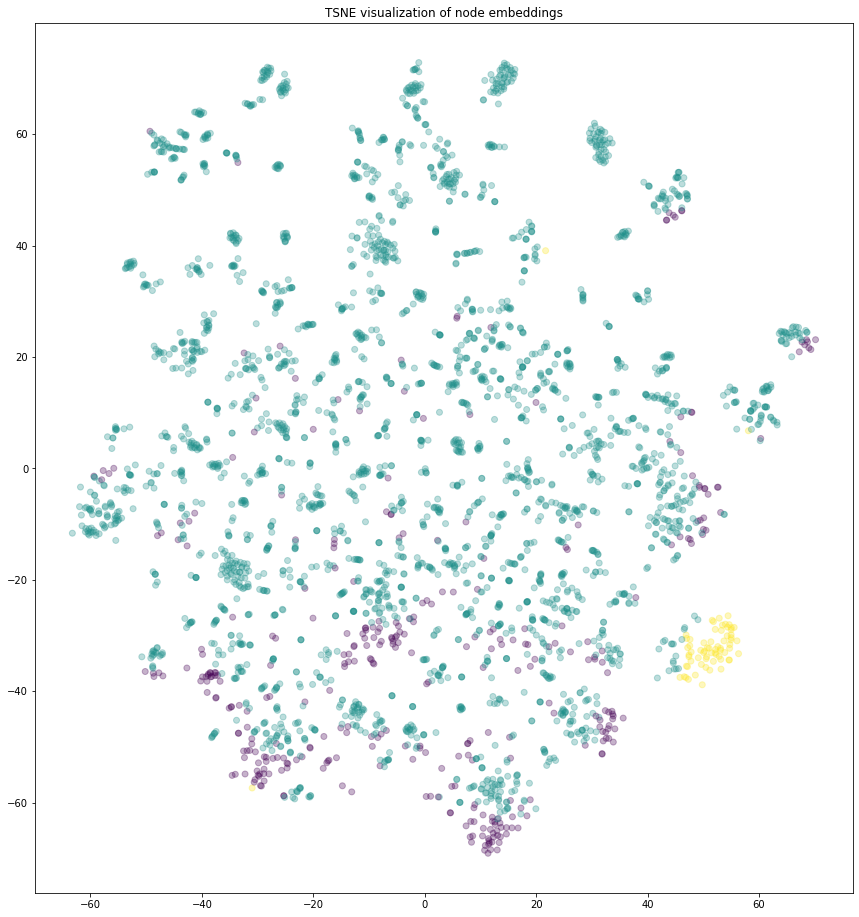

In [65]:
from sklearn.manifold import TSNE
kmeans = KMeans(n_clusters=3)
kmeans.fit(actor_embeddings)

transform = TSNE #PCA
trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(actor_embeddings)

import numpy as np

# draw the points
label_map = { l: i for i, l in enumerate(np.unique(kmeans.labels_))}
node_colours = [ label_map[target] for target in kmeans.labels_]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")

plt.scatter(node_embeddings_2d[:,0],node_embeddings_2d[:,1],c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))
plt.show()

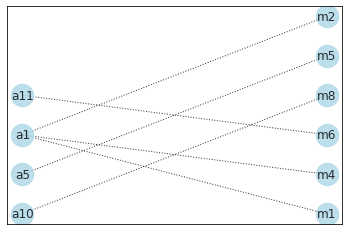

In [66]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [69]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [70]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    cost2=0.0 # calculate cost1 
    numerator_cost2= len(graph.edges())
    lst=[]
    # storing movie nodes
    for i in graph.nodes():
      if "m" in i:
        lst.append(i)
    denominator_cost2 = len(lst)
    cost2 += numerator_cost2 /denominator_cost2
    return cost2/number_of_clusters

<font color='cyan'>Grader function - 4</font>

In [71]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

## **Task-2**

In [72]:
from sklearn.cluster import KMeans

number_of_clusters = [3, 5, 10, 30, 50, 100, 200, 500]

for cl in number_of_clusters:
  kmeans = KMeans(n_clusters=cl)
  kmeans.fit(movie_embeddings)
  cluster_number_for_data_point = kmeans.labels_
  list_of_all_cluster=[]
  unique = np.unique(cluster_number_for_data_point)
  dict_of_movie_nodes = dict(zip(movie_nodes, cluster_number_for_data_point))
  for number in unique:
    cluster=[]
    for node, cluster_number in dict_of_movie_nodes.items():
      if cluster_number == number:
        cluster.append(node)
    list_of_all_cluster.append(cluster)

  # calculate cost1 and cost2 
  cost1=0
  cost2=0
  for cluster_ in list_of_all_cluster:
    G= nx.Graph()
    for movie_node in cluster_:
      sub_graph = nx.ego_graph(B,movie_node)
      G.add_nodes_from(sub_graph.nodes())
      G.add_edges_from(sub_graph.edges())
    numerator= max(nx.connected_components(G), key=len)
    denominator = len(G.nodes)
    cost1 += len(numerator) /denominator
    numerator_cost2= len(G.edges())
    # Here grap
    # Create empty list
    lst=[]
    # storing movie nodes
    for i in G.nodes():
      if "m" in i:
        lst.append(i)
    denominator_cost2 = len(lst)
    cost2 += numerator_cost2 /denominator_cost2

  print("cluster of cost " ,cl ,(cost1/len(list_of_all_cluster))* (cost2/len(list_of_all_cluster)))

cluster of cost  3 8.229609269251204
cluster of cost  5 8.651206945850737
cluster of cost  10 9.478518967481966
cluster of cost  30 13.060122169024808
cluster of cost  50 13.059650828770703
cluster of cost  100 14.024205271848476
cluster of cost  200 12.731861278345995
cluster of cost  500 10.340357258407126


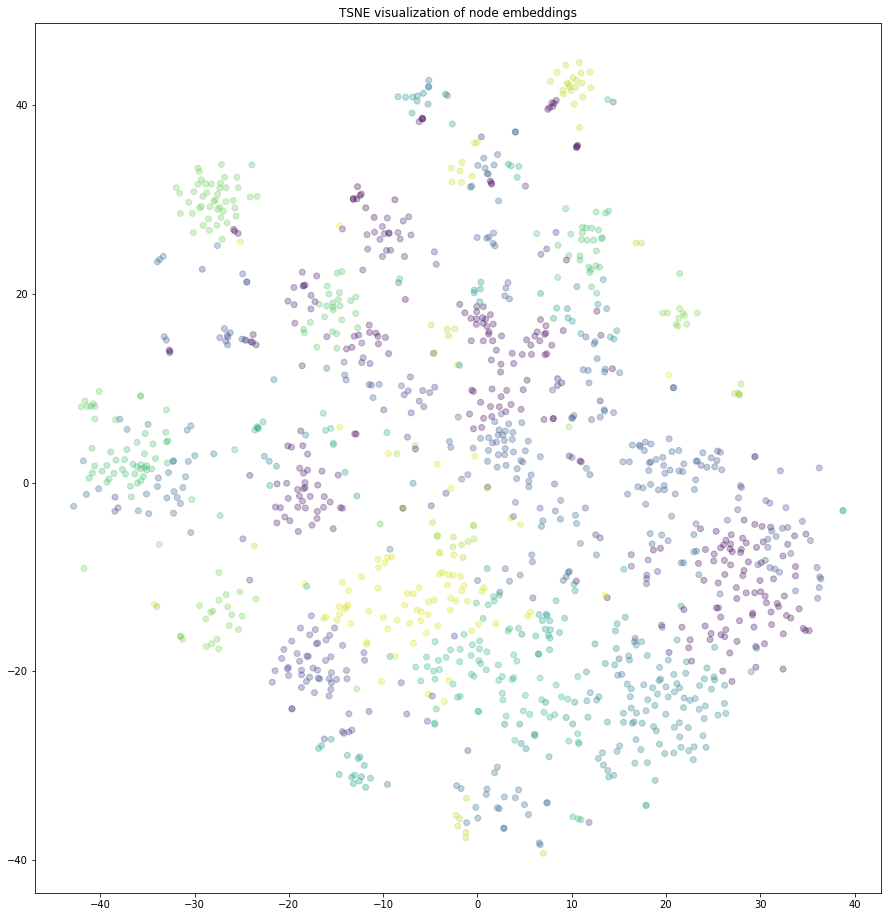

In [73]:
from sklearn.manifold import TSNE

transform = TSNE #PCA
trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(movie_embeddings)

kmeans = KMeans(n_clusters=50)
kmeans.fit(movie_embeddings)

import numpy as np

# draw the points
label_map = { l: i for i, l in enumerate(np.unique(kmeans.labels_))}
node_colours = [ label_map[target] for target in kmeans.labels_]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")

plt.scatter(node_embeddings_2d[:,0],node_embeddings_2d[:,1],c=node_colours, alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))
plt.show()

# Grouping similar actors

In [74]:
kmeans = KMeans(n_clusters=cl)
kmeans.fit(actor_embeddings)
cluster_number_for_data_point = kmeans.labels_
list_of_all_cluster=[]
unique = np.unique(cluster_number_for_data_point)
dict_of_actor_nodes = dict(zip(actor_nodes, cluster_number_for_data_point))
for number in unique:
  cluster=[]
  for node, cluster_number in dict_of_actor_nodes.items():
    if cluster_number == number:
      cluster.append(node)
  list_of_all_cluster.append(cluster)

# Displaying similar actor clusters

In [75]:
for cluster_a in list_of_all_cluster:
  print(cluster_a)

['a3617', 'a3433', 'a1683', 'a2037', 'a1614', 'a2041', 'a2040', 'a1135', 'a3285', 'a2124', 'a3430', 'a3550', 'a3382', 'a3385', 'a2036', 'a1113', 'a3562', 'a3343', 'a2175', 'a3412', 'a1749', 'a2519', 'a1608', 'a3569', 'a3554', 'a3194', 'a1323', 'a1605', 'a2025', 'a3221', 'a1612', 'a3406', 'a1398', 'a2269', 'a1611', 'a2511', 'a3615', 'a3404', 'a3383', 'a3421', 'a1293', 'a2363', 'a1780', 'a2039', 'a1682', 'a1360', 'a3401', 'a1356', 'a1228', 'a1555', 'a3618', 'a2515', 'a2771', 'a3395', 'a498', 'a1208', 'a3619', 'a2597', 'a1333', 'a3620', 'a1311', 'a1374', 'a1247', 'a3583', 'a1129', 'a1578', 'a2', 'a1880', 'a3576', 'a2483', 'a3577', 'a660', 'a113', 'a3625', 'a1610', 'a3440', 'a1372', 'a1613', 'a1007', 'a3275', 'a1127', 'a2201', 'a1350', 'a2224', 'a1627', 'a3286', 'a2136', 'a1707', 'a1371', 'a1352', 'a1534', 'a1863', 'a1241', 'a1375', 'a2665']
['a968']
['a1033']
['a2562', 'a2722', 'a2723', 'a2883', 'a2881', 'a2721']
['a1039']
['a1109', 'a1115', 'a1081', 'a1107', 'a1112', 'a1110', 'a1116', 'a

# Grouping similar movies

In [76]:
kmeans = KMeans(n_clusters=cl)
kmeans.fit(movie_embeddings)
cluster_number_for_data_point = kmeans.labels_
list_of_all_cluster=[]
unique = np.unique(cluster_number_for_data_point)
dict_of_movie_nodes = dict(zip(movie_nodes, cluster_number_for_data_point))
for number in unique:
  cluster=[]
  for node, cluster_number in dict_of_movie_nodes.items():
    if cluster_number == number:
      cluster.append(node)
  list_of_all_cluster.append(cluster)

## Displaying similar movie clusters

In [77]:
for cluster_m in list_of_all_cluster:
  print(cluster_m)

['m1086', 'm7', 'm9', 'm10', 'm8']
['m998', 'm1039', 'm1033']
['m224', 'm218', 'm227', 'm220', 'm225', 'm229', 'm226']
['m818', 'm368', 'm237', 'm1042', 'm896', 'm819', 'm979', 'm481', 'm500', 'm233', 'm955', 'm235', 'm479', 'm497']
['m426']
['m175']
['m910', 'm912']
['m1104', 'm1088', 'm1107', 'm1109', 'm1115', 'm1105']
['m305', 'm1081', 'm693', 'm302']
['m1257', 'm1282', 'm1246']
['m295', 'm697', 'm699', 'm1326', 'm297', 'm654', 'm1346', 'm491', 'm811', 'm671', 'm346', 'm1359', 'm1354', 'm632', 'm536']
['m465', 'm464', 'm455', 'm459', 'm750', 'm470', 'm460', 'm469', 'm751', 'm467', 'm466', 'm458', 'm457', 'm749', 'm1381', 'm473', 'm456', 'm474', 'm462']
['m588', 'm400', 'm597', 'm878']
['m1015', 'm958', 'm1050', 'm1018', 'm961']
['m115']
['m391']
['m1263']
['m150']
['m783', 'm686', 'm1308', 'm701', 'm709', 'm920', 'm712', 'm239', 'm865', 'm683', 'm688', 'm1144', 'm528', 'm526', 'm1145', 'm1301', 'm868']
['m586']
['m83']
['m1106']
['m146', 'm162', 'm161', 'm144', 'm143', 'm163', 'm164